# Project 2

We are working with the Spotify 1-Million Song dataset. The data will be constructed as a large 2-node network, where artists will be connected to Spotify listeners. By linking these nodes through edges representing artists listened to by users, the goal is to evaluate the relationships between artists based on listening habits, and likewise, assess the relationships between users based on the artists they listen to. This information could be used to determine which artists to bring together for an event aimed at reaching a broad audience, or to explore potential collaborations between top artists for marketing purposes. Lastly, we will evaluate isolated nodes, allowing us to explore how to set up targeted marketing campaigns and develop unique messaging for users who listen to specific artists.

The data can be accessed [here](https://www.kaggle.com/datasets/undefinenull/million-song-dataset-spotify-lastfm/data)

[Explanation](https://www.youtube.com/)

## Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from networkx.algorithms import bipartite

## Import Datasets

We will be importing two data files. The first will contain detailed information about each song, including its associated album and artist. The second dataset will include the listening history of Spotify users, showing the relationship between each track and its play count.

In [2]:
music_info_df = pd.read_csv("music_info.csv")

In [3]:
music_info_df.head(10)

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4
5,TRUMISQ128F9340BEE,Somebody Told Me,The Killers,https://p.scdn.co/mp3-preview/0d07673cfb46218a...,0FNmIQ7u45Lhdn6RHhSLix,"rock, alternative, indie, pop, alternative_roc...",NaN,2005,198480,0.508,...,10,-4.289,0,0.0847,0.000087,0.000643,0.0641,0.704,138.030,4
6,TRVCCWR128F9304A30,Viva la Vida,Coldplay,https://p.scdn.co/mp3-preview/ab747fed1bfab2ac...,08A1lZeyLMWH58DT6aYjnC,"rock, alternative, indie, pop, alternative_roc...",NaN,2013,235384,0.588,...,8,-7.903,1,0.1050,0.153000,0.000000,0.0634,0.520,137.973,4
7,TRXOGZT128F424AD74,Karma Police,Radiohead,https://p.scdn.co/mp3-preview/5a09f5390e2862af...,01puceOqImrzSfKDAcd1Ia,"rock, alternative, indie, alternative_rock, in...",NaN,1996,264066,0.360,...,7,-9.129,1,0.0260,0.062600,0.000092,0.1720,0.317,74.807,4
8,TRMZXEW128F9341FD5,The Scientist,Coldplay,https://p.scdn.co/mp3-preview/95cb9df1b056d759...,0GSSsT9szp0rJkBrYkzy6s,"rock, alternative, indie, pop, alternative_roc...",Rock,2007,311014,0.566,...,5,-7.826,1,0.0242,0.715000,0.000014,0.1200,0.173,146.365,4
9,TRUJIIV12903CA8848,Clocks,Coldplay,https://p.scdn.co/mp3-preview/24c7fe858b234e3c...,0BCPKOYdS2jbQ8iyB56Zns,"rock, alternative, indie, pop, alternative_roc...",NaN,2002,307879,0.577,...,5,-7.215,0,0.0279,0.599000,0.011500,0.1830,0.255,130.970,4


In [4]:
user_history_df = pd.read_csv("user_history.csv")

In [5]:
user_history_df.head(10)

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
5,TRGRDEC128F423C07D,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
6,TRRYCBO128F932A2C7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
7,TRUTULC128F4293712,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
8,TRAAHSY128F147BB5C,b80344d063b5ccb3212f76538f3d9e43d87dca9e,2
9,TRDLMWP128F426BF6C,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


## Exploratory Analysis

### Check for Distinct Grouping

We will look to make sure there are no duplicate **track_id** to **user_id** rows. We can see that each row is unique.

In [6]:
duplicate_count = user_history_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


### Unique Track and User ID counts
We now will look to see how many unique tracks and user IDs exist. We can see that we have over 30K unique tracks with close to 1 million unique users. 

In [7]:
user_history_df.nunique()

track_id      30459
user_id      962037
playcount       430
dtype: int64

## Merge datasets

We will merge the two separate datasets to match every **user_id** tracked listened to with each artist's details.

In [8]:
merged_df = user_history_df.merge(music_info_df, how='left')
merged_df

,track_id,user_id,playcount,name,artist,spotify_preview_url,spotify_id,tags,genre,year,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Nothing From Nothing,Billy Preston,https://p.scdn.co/mp3-preview/340c79f3f19b448e...,0d42LKqrWFVu05jAv9mwwE,"soul, funk, piano, 70s, oldies",RnB,2010,...,9,-5.206,0,0.0276,0.585000,0.055000,0.3310,0.939,102.792,4
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Paper Gangsta,Lady Gaga,https://p.scdn.co/mp3-preview/5d27f0eb10363c13...,079ZOccLpNsrEiKBaiTrqI,"electronic, pop, female_vocalists, dance, pian...",Pop,2012,...,10,-9.344,0,0.0579,0.804000,0.782000,0.1050,0.800,100.002,4
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Soy,Gipsy Kings,https://p.scdn.co/mp3-preview/a103c32c238829f9...,1D3gFdVhv8iJNMTih2Geq3,guitar,NaN,2003,...,5,-11.647,1,0.0673,0.692000,0.000002,0.1100,0.851,104.518,4
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Stacked Actors,Foo Fighters,https://p.scdn.co/mp3-preview/d7350c743c3d917f...,1vziI0NCJKrqKiG94COHBa,"rock, alternative, alternative_rock, hard_rock...",Rock,1999,...,7,-5.145,1,0.0500,0.002030,0.001020,0.2340,0.670,134.898,4
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Heaven's Gonna Burn Your Eyes,Thievery Corporation,https://p.scdn.co/mp3-preview/c7f3b22fb4a680f0...,4SnH0V1cnEPUqMSzgDlxKb,"electronic, female_vocalists, ambient, chillou...",Electronic,2002,...,9,-9.812,1,0.0286,0.635000,0.521000,0.0637,0.323,152.411,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9711296,TRBKFKL128E078ED76,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1,Hailie's Song,Eminem,https://p.scdn.co/mp3-preview/8066502b5705f0e6...,00t8f0jxCP556HvIoMulCZ,"pop, rap, hip_hop, love, 00s",Rap,2002,...,9,-3.307,0,0.2260,0.015400,0.000107,0.0794,0.499,161.869,4
9711297,TRYFXPG128E078ECBD,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1,Forgot About Dre,Dr. Dre,https://p.scdn.co/mp3-preview/3dc8e32ac13cbe0c...,0D8Npw3PzW1srmITkELL3s,"rap, hip_hop",Rap,1999,...,8,-1.294,1,0.0647,0.101000,0.000000,0.1790,0.650,133.966,4
9711298,TROBUUZ128F4263002,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1,Paralyzer,Finger Eleven,https://p.scdn.co/mp3-preview/3a022966b144db7b...,06oFkihdWaUvtEnzpEIaM6,"rock, alternative, alternative_rock, hard_rock",Rock,2007,...,11,-3.472,0,0.0439,0.163000,0.000000,0.1820,0.881,106.000,4
9711299,TROEWXC128F148C83E,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1,What's The Difference,Dr. Dre,https://p.scdn.co/mp3-preview/70aa36016c21bb09...,1SWVDBtw6h3tm9OehOkDhv,"rap, 90s, hip_hop",NaN,1999,...,11,-0.140,0,0.2500,0.223000,0.000000,0.1480,0.770,91.921,4


## Drop Columns

There is a lot of useful details, but we will drop columns that will not be needed to perform our network graph analysis. 

In [9]:
idx = np.r_[5:7, 8:9, 10:23]
spotify_df = merged_df.copy()
spotify_df = spotify_df.drop(spotify_df.columns[idx], axis=1)
spotify_df.head(10)

,track_id,user_id,playcount,name,artist,tags,year
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Nothing From Nothing,Billy Preston,"soul, funk, piano, 70s, oldies",2010
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Paper Gangsta,Lady Gaga,"electronic, pop, female_vocalists, dance, pian...",2012
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Soy,Gipsy Kings,guitar,2003
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Stacked Actors,Foo Fighters,"rock, alternative, alternative_rock, hard_rock...",1999
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Heaven's Gonna Burn Your Eyes,Thievery Corporation,"electronic, female_vocalists, ambient, chillou...",2002
5,TRGRDEC128F423C07D,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Let It Be Sung,Jack Johnson,"singer_songwriter, soundtrack, acoustic, chill",2006
6,TRRYCBO128F932A2C7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Love Shack,The B-52's,"rock, alternative, pop, dance, 80s, new_wave",2010
7,TRUTULC128F4293712,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Gimme Stitches,Foo Fighters,"rock, alternative_rock, hard_rock, grunge",1999
8,TRAAHSY128F147BB5C,b80344d063b5ccb3212f76538f3d9e43d87dca9e,2,Speed of Sound,Coldplay,"rock, alternative, indie, pop, alternative_roc...",2008
9,TRDLMWP128F426BF6C,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Ragged Wood,Fleet Foxes,"rock, alternative, indie, folk, indie_rock, 00...",2008


## Scale Back
This dataset is quite large to run locally, so we will first scale down the dataset with a sample of 20 users and the songs listened to.

In [10]:
sample_users = spotify_df['user_id'].sample(n=30, random_state=123)
sample_users

1841366    0f7e3b29fdbf1a63941714aeb1859265d1a7c037
8895       80d0e18e5aae5bd6bc6b0cc917840dc9c63ed64d
3181493    1b28a2e1742096649d1d1a3c25d1dba53735ccc2
4744649    9f315633ba1f8aa84e8bbd4d0ec50adf15a21fb4
5594448    9a7e59cd74523b03dae61544e51386960ae5c235
9371842    454749c59c7f832813ea8fb76fa66e5ffceec7b0
7564288    a1c78f0885a7c0b65ec3a03c6cd5df321edaf1e3
6874244    3f383794a8a8a46654d126102a6ec0a6b04f9685
3990929    c08a5e0ddbda33363d721a2eb9eaa5a232961a21
7582650    b95f9f228488a1070fca65a3f4bbf1dcbb310908
511757     dc357b9d39c81c227faa481c4035f5f3683709d5
8926633    e87e1b71c1635a5d02d0ca45da6d51a2230ddc3c
7973165    dc8767b902e6c387e1198dd197f4249f3b7d3cbe
4606594    fb51283beb5c3ad2350a99b3de8c2671d0c503d3
661913     051ff48d2a296ef144d6257aaa0cb5521be98d5a
6430522    08c3187f702c9b6f154d6a3b477ad7385507c4a2
7940032    32b5acac69f7a03b0d5f1811b7273e1ab8dda554
9482500    9e6f36bc96c7f5246da4761350a6050934061ae7
7042694    3c9d37a34f3364c4821f125373c6d497df0ebbb7
2130127    e

In [11]:
filtered_user_df = spotify_df[spotify_df['user_id'].isin(sample_users)].reset_index(drop=True)
filtered_user_df

,track_id,user_id,playcount,name,artist,tags,year
0,TRFAEPZ128F427AFB2,80d0e18e5aae5bd6bc6b0cc917840dc9c63ed64d,2,The Sparrow,Mastodon,"instrumental, progressive_rock, psychedelic, p...",2011
1,TRCRCBT128F4260DD1,80d0e18e5aae5bd6bc6b0cc917840dc9c63ed64d,1,Such Great Heights,The Postal Service,"rock, electronic, alternative, indie, pop, ind...",2003
2,TRNNGMK128F423F034,80d0e18e5aae5bd6bc6b0cc917840dc9c63ed64d,7,Where Is My Mind?,Pixies,"rock, alternative, indie, alternative_rock, in...",2005
3,TRDTKOY128E07953E5,80d0e18e5aae5bd6bc6b0cc917840dc9c63ed64d,4,Khaki Suit,Damian Marley,reggae,2014
4,TRHTSDD128F92E7CEE,80d0e18e5aae5bd6bc6b0cc917840dc9c63ed64d,2,I'm Not a Punk,Descendents,"punk, punk_rock",1982
...,...,...,...,...,...,...,...
1064,TRRBBOH128F92F99E8,9e6f36bc96c7f5246da4761350a6050934061ae7,5,Tigerlily,La Roux,"electronic, indie, pop, female_vocalists, danc...",2009
1065,TRQHPTI128E0786BA5,9e6f36bc96c7f5246da4761350a6050934061ae7,2,My Lover's Box,Garbage,"rock, alternative, female_vocalists, alternati...",1995
1066,TRFOPHS128F93351E2,9e6f36bc96c7f5246da4761350a6050934061ae7,4,Ever Fallen in Love,Nouvelle Vague,"female_vocalists, chillout, indie_pop, love, f...",2006
1067,TRJSEXD128F423DBC4,9e6f36bc96c7f5246da4761350a6050934061ae7,1,Weird Fishes/Arpeggi,Radiohead,"rock, electronic, alternative, indie, alternat...",2013


Once again we will sample down to 20 unique artists within the 20 users we parsed down earlier. 

In [12]:
sample_artists = filtered_user_df['artist'].sample(n=30, random_state=6)
sample_artists

521        Gustavo Santaolalla
178                  Daft Punk
597                The Killers
998                       UB40
540                        Sia
832                       Luna
682                     Metric
229                Biffy Clyro
137            The Radio Dept.
530                   Owl City
22                      Beirut
434            Black Eyed Peas
492          Infected Mushroom
785                   The Whip
919                Fiona Apple
109                     Mogwai
676                  Holy Fuck
269           The Decemberists
273      The New Pornographers
511              José González
886                   Lykke Li
71                  John Mayer
56                        Beck
652                       Ride
55                Jack Johnson
806                       UB40
274           The Decemberists
525    The Black Dahlia Murder
986             Michael Bolton
542              Laura Marling
Name: artist, dtype: object

In [13]:
filtered_artist_df = filtered_user_df[filtered_user_df['artist'].isin(sample_artists)].reset_index(drop=True)
filtered_artist_df

,track_id,user_id,playcount,name,artist,tags,year
0,TRBJOGT128F42396CC,80d0e18e5aae5bd6bc6b0cc917840dc9c63ed64d,2,A Sunday Smile,Beirut,"rock, alternative, indie, experimental, folk, ...",2007
1,TRTPWWP128F1486DF3,80d0e18e5aae5bd6bc6b0cc917840dc9c63ed64d,16,Elephant Gun,Beirut,"alternative, indie, folk, singer_songwriter, m...",2010
2,TRHVRWL128F42396D6,80d0e18e5aae5bd6bc6b0cc917840dc9c63ed64d,26,The Flying Club Cup,Beirut,"alternative, indie, experimental, folk, americ...",2007
3,TRYJFWA128F92D3188,80d0e18e5aae5bd6bc6b0cc917840dc9c63ed64d,5,The Shrew,Beirut,"folk, singer_songwriter, american",2009
4,TRSLEZZ128F42396D3,80d0e18e5aae5bd6bc6b0cc917840dc9c63ed64d,3,Un Dernier Verre (Pour La Route),Beirut,"indie, folk, piano, american",2007
...,...,...,...,...,...,...,...
158,TRMGGGR128F42889D4,e87e1b71c1635a5d02d0ca45da6d51a2230ddc3c,1,We're Going To Be Friends,Jack Johnson,"singer_songwriter, chillout, soundtrack, acous...",2006
159,TRLKOKT128F930984C,e87e1b71c1635a5d02d0ca45da6d51a2230ddc3c,1,Don't Lie,Black Eyed Peas,"pop, dance, rap, hip_hop, funk, rnb",2007
160,TRMOFZF128EF343501,e87e1b71c1635a5d02d0ca45da6d51a2230ddc3c,1,Emergency Exit,Beck,"rock, electronic, alternative, folk, indie_roc...",2005
161,TRXFBNU12903CCBE8A,e87e1b71c1635a5d02d0ca45da6d51a2230ddc3c,5,When a Man Loves a Woman,Michael Bolton,"pop, 80s, 90s, love",1995


## Most Listened to Songs

### By a Single User

We find that our top song came out in 2014 and is called **Cherbourg** by *Beirut* and was played 84 times. 

In [14]:
filtered_artist_df.sort_values('playcount', ascending=False).head(10)

,track_id,user_id,playcount,name,artist,tags,year
9,TRCZWJA128F42396D4,80d0e18e5aae5bd6bc6b0cc917840dc9c63ed64d,29,Cherbourg,Beirut,"indie, folk, american",2007
2,TRHVRWL128F42396D6,80d0e18e5aae5bd6bc6b0cc917840dc9c63ed64d,26,The Flying Club Cup,Beirut,"alternative, indie, experimental, folk, americ...",2007
1,TRTPWWP128F1486DF3,80d0e18e5aae5bd6bc6b0cc917840dc9c63ed64d,16,Elephant Gun,Beirut,"alternative, indie, folk, singer_songwriter, m...",2010
106,TRILTQH128F93264C4,a1c78f0885a7c0b65ec3a03c6cd5df321edaf1e3,15,Billy Liar,The Decemberists,"indie, folk, indie_pop",2012
36,TRJAPJF128F146CB4E,051ff48d2a296ef144d6257aaa0cb5521be98d5a,11,Travel Is Dangerous,Mogwai,"experimental, instrumental, post_rock",2006
104,TRAANSZ128F425DD63,a1c78f0885a7c0b65ec3a03c6cd5df321edaf1e3,10,Stop Coming to My House,Mogwai,"ambient, experimental, instrumental, post_rock",2005
119,TRARMZP128F428630B,b95f9f228488a1070fca65a3f4bbf1dcbb310908,8,Napoleon On The Bellerophon,Beirut,"indie, folk, piano",2007
134,TRFIIHS128F427EF9D,b95f9f228488a1070fca65a3f4bbf1dcbb310908,8,On the Bus Mall,The Decemberists,"indie, folk, acoustic, indie_pop, beautiful, m...",2005
35,TRRNOUT128F425DCF5,051ff48d2a296ef144d6257aaa0cb5521be98d5a,7,You Don't Know Jesus,Mogwai,"ambient, experimental, instrumental, post_rock",2010
162,TRZABVF128F145876E,e87e1b71c1635a5d02d0ca45da6d51a2230ddc3c,6,Sing Our Own Song,UB40,reggae,2009


### Average Across Users

If we look for the average playcount of a track and discover the top song played across users, we once again find the song **Cherbourg** by *Beirut* once again leads this list with an average playcount of 29

In [15]:
filtered_artist_df.groupby(['track_id', 'name', 'artist', 'tags', 'year']).agg(avg_playcount =('playcount', 'mean')).reset_index().sort_values('avg_playcount', ascending=False).head(10)

,track_id,name,artist,tags,year,avg_playcount
18,TRCZWJA128F42396D4,Cherbourg,Beirut,"indie, folk, american",2007,29.0
45,TRILTQH128F93264C4,Billy Liar,The Decemberists,"indie, folk, indie_pop",2012,15.0
42,TRHVRWL128F42396D6,The Flying Club Cup,Beirut,"alternative, indie, experimental, folk, americ...",2007,13.5
50,TRJAPJF128F146CB4E,Travel Is Dangerous,Mogwai,"experimental, instrumental, post_rock",2006,11.0
98,TRTPWWP128F1486DF3,Elephant Gun,Beirut,"alternative, indie, folk, singer_songwriter, m...",2010,9.0
86,TRRNOUT128F425DCF5,You Don't Know Jesus,Mogwai,"ambient, experimental, instrumental, post_rock",2010,7.0
127,TRZABVF128F145876E,Sing Our Own Song,UB40,reggae,2009,6.0
103,TRUJGLJ128F146CB4D,Acid Food,Mogwai,"ambient, indie_rock, instrumental, post_rock, ...",2006,6.0
99,TRTUWMO128F92F2A09,Dear Vienna,Owl City,"electronic, indie, male_vocalists, synthpop",2008,6.0
85,TRRKXFG128F425DD52,Kids Will Be Skeletons,Mogwai,"indie, ambient, experimental, instrumental, ch...",2003,6.0


### Top Songs Across Various Listeners

When we look at songs that have the most unique users listening to them, we find that 3 of the top 10 songs have 3 unique users. Some of the songs include **Stop Coming to My House** by *Mogwai*, and **The Ballad of Michael Valentine** by *The Killers*.

In [16]:
filtered_artist_df.groupby(['track_id', 'name', 'artist', 'tags', 'year']).agg(unique_users=('user_id', 'nunique')).reset_index().sort_values('unique_users', ascending=False).head(10)

,track_id,name,artist,tags,year,unique_users
0,TRAANSZ128F425DD63,Stop Coming to My House,Mogwai,"ambient, experimental, instrumental, post_rock",2005,3
24,TREMERW128F429EA31,Letter From an Occupant,The New Pornographers,"indie, indie_rock, indie_pop, 00s",2000,3
128,TRZDXMH128F429EB49,The Bleeding Heart Show,The New Pornographers,"indie, indie_rock, indie_pop",2005,3
21,TRDNHAW128F429DB9A,The Ballad of Michael Valentine,The Killers,"rock, alternative, indie, alternative_rock, in...",2004,3
78,TRQLWDC128F42396CF,Cliquot,Beirut,"indie, experimental, folk, instrumental, singe...",2007,2
68,TRMZYRP128F9326829,The Legionnaire's Lament,The Decemberists,"indie, folk, singer_songwriter, indie_pop",2002,2
65,TRMGGGR128F42889D4,We're Going To Be Friends,Jack Johnson,"singer_songwriter, chillout, soundtrack, acous...",2006,2
64,TRLVQME128F931BAF3,Vanilla Twilight,Owl City,"electronic, indie, pop, love, beautiful, synthpop",2014,2
59,TRLMNEE128F42A52E0,Go Places,The New Pornographers,"indie, indie_rock",2007,2
19,TRDJDUD128F931B10C,Gimme Sympathy,Metric,"alternative, indie, female_vocalists, indie_rock",2009,2


## Most Popular Artist

### Total Users Across Albums

We find that the artist **Mogwai** has the most users listening to their work across each of their tracks

In [17]:
filtered_artist_df.groupby(['artist']).agg(total =('user_id', 'count')).reset_index().sort_values('total', ascending=False)

,artist,total
24,The New Pornographers,24
17,Mogwai,24
1,Beirut,19
15,Metric,13
8,Infected Mushroom,12
22,The Decemberists,10
9,Jack Johnson,7
0,Beck,6
18,Owl City,6
23,The Killers,5


### Total Unique Users

However when we look at how many unique users listen across them, we find **The Killers** have the most with 4. This means some users may listen to a lot of different tracks across albums, but in general, it does reach across many users.

In [18]:
filtered_artist_df.groupby(['artist']).agg(unique_users=('user_id', 'nunique')).reset_index().sort_values('unique_users', ascending=False).head()

,artist,unique_users
24,The New Pornographers,5
23,The Killers,5
9,Jack Johnson,5
15,Metric,5
1,Beirut,4


## Build Network Graph

Now to build our network graph, we will remove duplicate rows where a user listens to an artist so that we may create the relationship between artists and users. 

In [19]:
spotify_network_df = filtered_artist_df[['artist', 'user_id']].drop_duplicates().reset_index(drop=True)
spotify_network_df.head(10)

,artist,user_id
0,Beirut,80d0e18e5aae5bd6bc6b0cc917840dc9c63ed64d
1,Beck,da78e3d224296af12ea528106e825b7686796e4a
2,Jack Johnson,da78e3d224296af12ea528106e825b7686796e4a
3,The Killers,da78e3d224296af12ea528106e825b7686796e4a
4,John Mayer,da78e3d224296af12ea528106e825b7686796e4a
5,Mogwai,051ff48d2a296ef144d6257aaa0cb5521be98d5a
6,Jack Johnson,051ff48d2a296ef144d6257aaa0cb5521be98d5a
7,The Radio Dept.,0f7e3b29fdbf1a63941714aeb1859265d1a7c037
8,The Killers,0f7e3b29fdbf1a63941714aeb1859265d1a7c037
9,Infected Mushroom,0f7e3b29fdbf1a63941714aeb1859265d1a7c037


## Artists

### Unweighted Projected Graph

Our first graph network is where we turn our bipartite graph from our 2-node network into one. The goal here is to see how artists are connected connected to each, regardless of how many listeners exist in the relationship. We find that **Mogwai** and **The Killers** lead our network with 11 listeners.

In [20]:
A = nx.Graph()
A.add_nodes_from(spotify_network_df["user_id"], bipartite=0)  
A.add_nodes_from(spotify_network_df["artist"], bipartite=1)   
A.add_edges_from(zip(spotify_network_df["user_id"], spotify_network_df["artist"]))  

artist_nodes = spotify_network_df["artist"].unique()
projected_graph = nx.bipartite.projected_graph(A, artist_nodes)

artist_degree_df = pd.DataFrame(list(projected_graph.degree()), columns=['Artist', 'Listeners'])
artist_degree_df.sort_values(by='Listeners', ascending=False).head(10)

,Artist,Listeners
3,The Killers,14
9,The New Pornographers,12
13,The Decemberists,11
0,Beirut,10
7,Infected Mushroom,10
14,Metric,10
5,Mogwai,10
4,John Mayer,9
2,Jack Johnson,9
11,Holy Fuck,8


### Weighted Projected Graph

This network graph now lets us learn how many users listen to an artist given a weight of how many users there are. Essentially, we provide more importance on how many people listen to said artist as opposed to just simply having a relationhship 

In [21]:
weighted_projected_graph = bipartite.weighted_projected_graph(A, artist_nodes)
artist_weight_df = pd.DataFrame(list(weighted_projected_graph.degree(weight='weight')), columns=['Artist', 'Listeners'])
artist_weight_df = artist_weight_df.sort_values(by='Listeners', ascending=False)
artist_weight_df.head(10)

,Artist,Listeners
3,The Killers,23
9,The New Pornographers,23
13,The Decemberists,21
14,Metric,17
5,Mogwai,14
0,Beirut,13
11,Holy Fuck,12
7,Infected Mushroom,11
4,John Mayer,10
2,Jack Johnson,10


## Discovering Islands

Using out weighted project graph, we will determine the top artists within each island that should be focused on. This allows us to be able to reach each portion of the network, especially if it is disconnected as a whole. When we do this, we find that we have three separate islands where if we were to produce a concert, we would want these top 3 artists at the event to maxmimze the audience we are trying to reach. 

- Island 1: **The Killers**
- Island 2: **Gustavo Santaolalla**
- Island 3: **Luna**

In [22]:
components = list(nx.connected_components(weighted_projected_graph))

In [23]:
df_components = pd.DataFrame({
    "component_id": range(1, len(components) + 1),
    "nodes": [list(comp) for comp in components],
    "size": [len(comp) for comp in components]
})

In [24]:
df_components

,component_id,nodes,size
0,1,"[The Radio Dept., Black Eyed Peas, Holy Fuck, ...",26
1,2,[Gustavo Santaolalla],1
2,3,[Luna],1


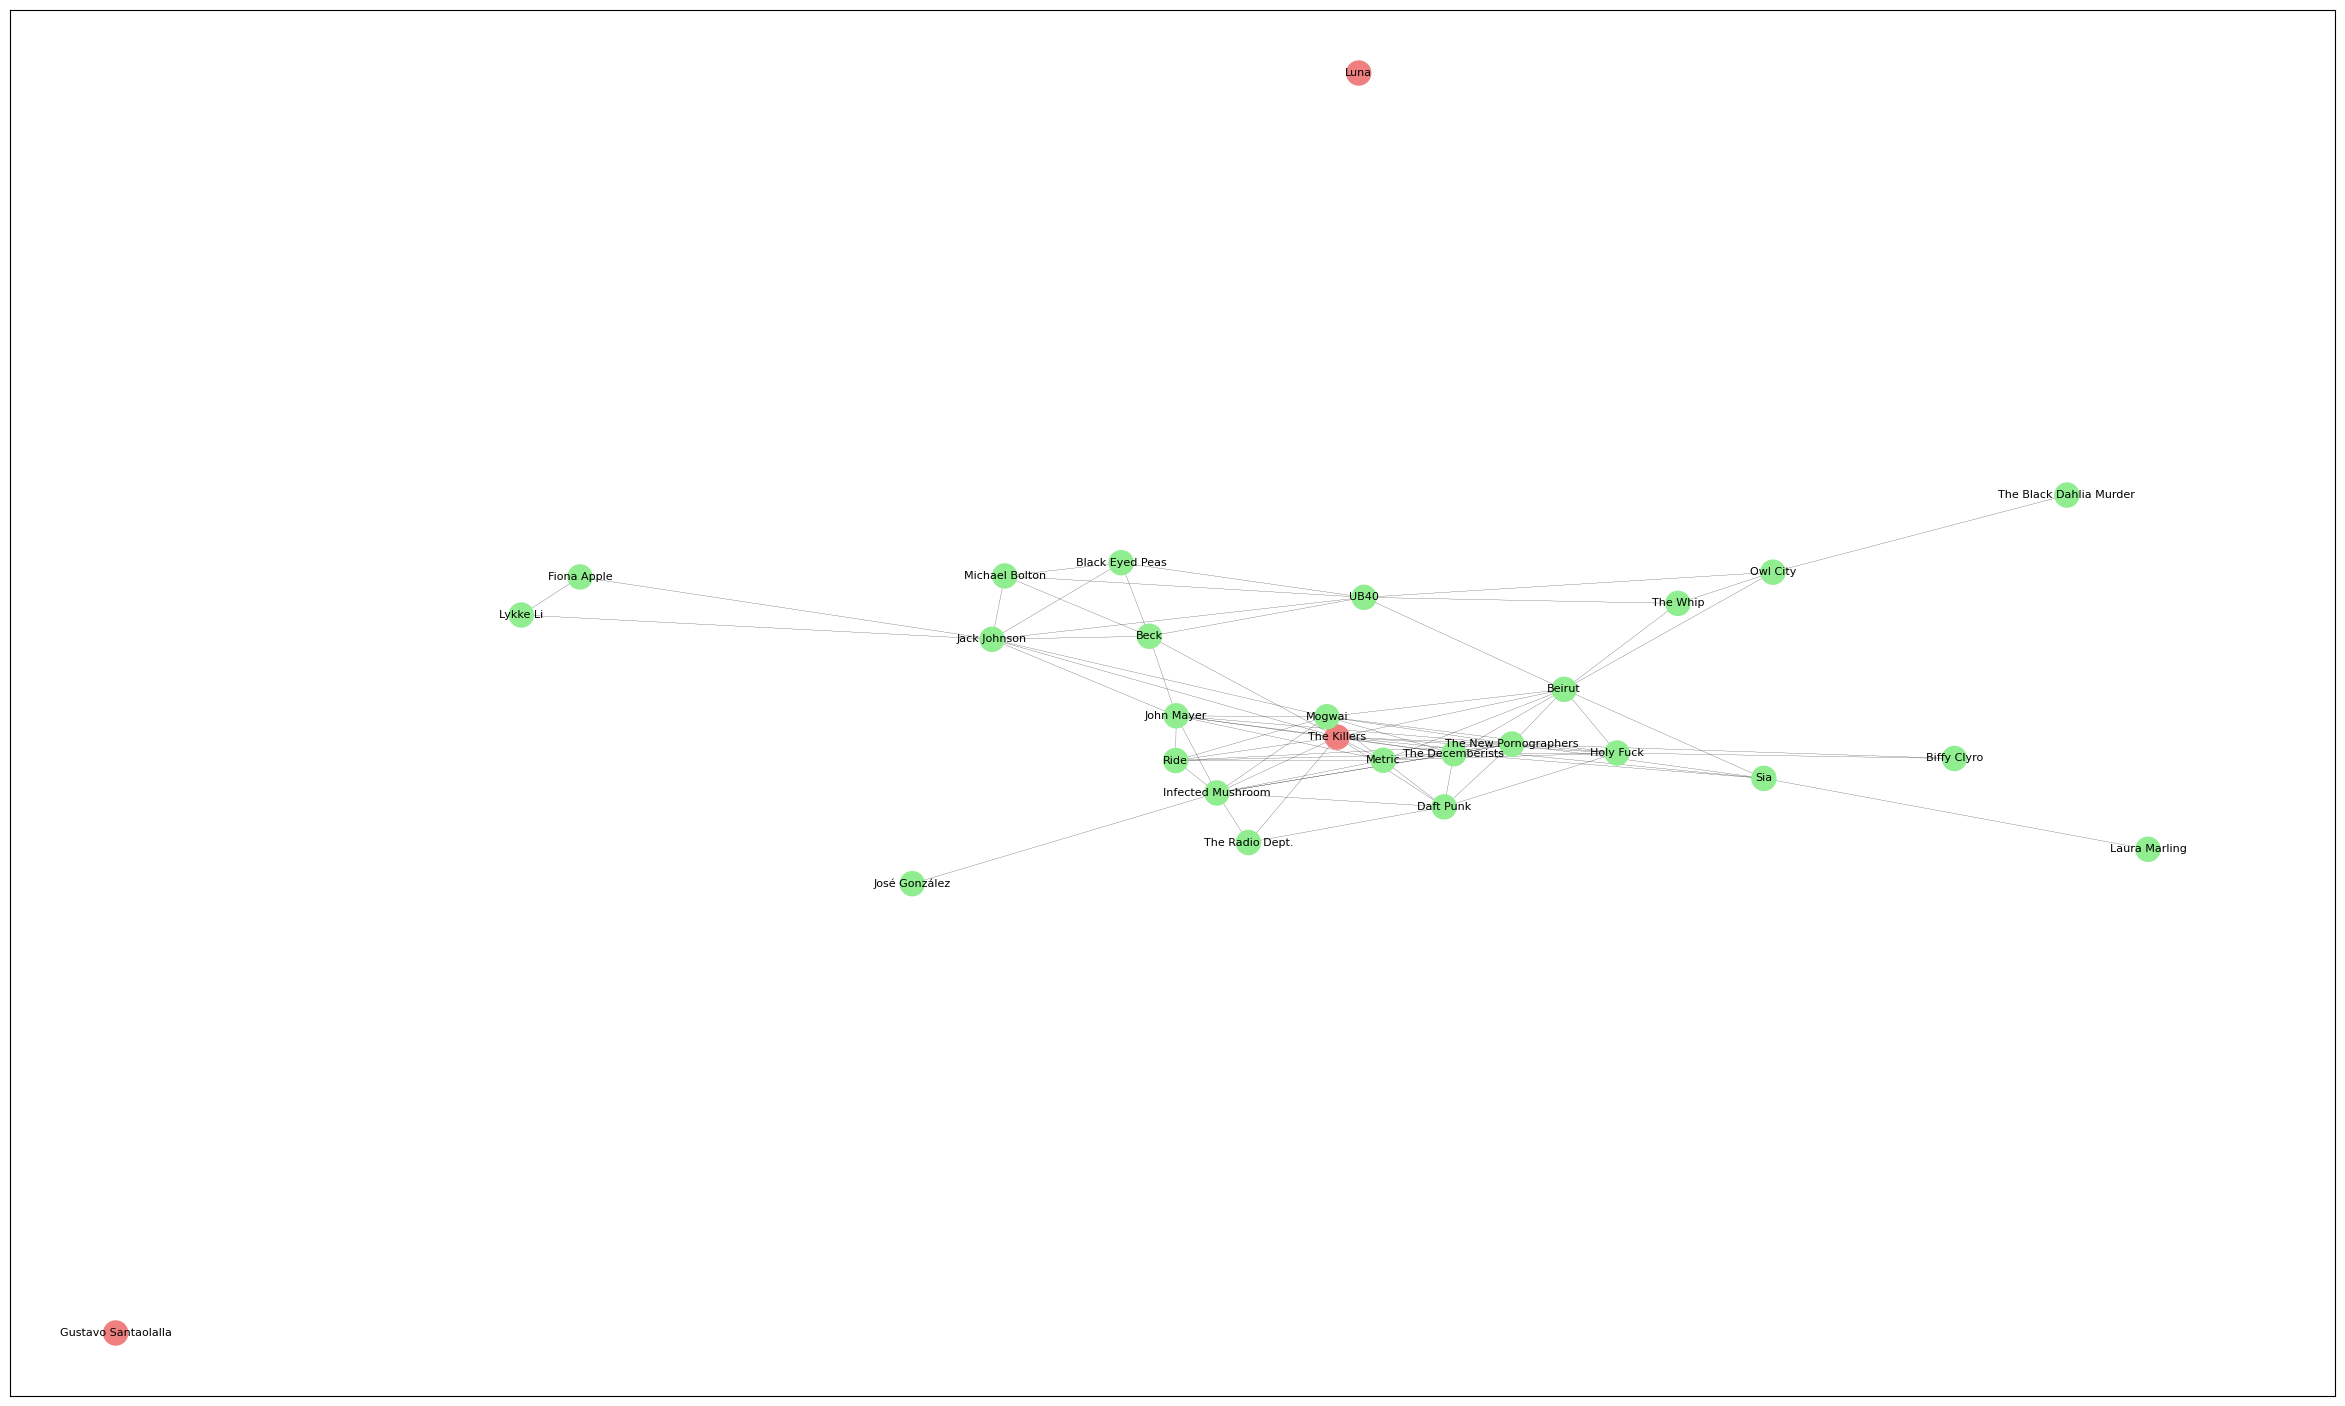

In [25]:
top_nodes = artist_weight_df["Artist"].head(1).tolist()
top_nodes.append(df_components['nodes'][1][0])
top_nodes.append(df_components['nodes'][2][0])

node_colors = ["lightcoral" if node in top_nodes else "lightgreen" for node in weighted_projected_graph.nodes]

pos = nx.spring_layout(weighted_projected_graph, seed=123)

fig, ax = plt.subplots(figsize=(30, 18))
nx.draw_networkx_nodes(weighted_projected_graph, pos, node_size=300, node_color=node_colors)
nx.draw_networkx_edges(weighted_projected_graph, pos, width=0.15)
nx.draw_networkx_labels(weighted_projected_graph, pos, font_size=8)

plt.show()

## Users

### Unweighted Projected Graph

Our first graph network is where we turn our bipartite graph from our 2-node network into one. The goal here is to see how users are connected connected to each, regardless of how many artists exist in the relationship. We find that **b95f9f228488a1070fca65a3f4bbf1dcbb310908** and **a1c78f0885a7c0b65ec3a03c6cd5df321edaf1e3** lead our network with 11 users.

In [28]:
U = nx.Graph()
U.add_nodes_from(spotify_network_df["user_id"], bipartite=0)  
U.add_nodes_from(spotify_network_df["artist"], bipartite=1)   
U.add_edges_from(zip(spotify_network_df["user_id"], spotify_network_df["artist"]))  

user_nodes = spotify_network_df["user_id"].unique()
projected_graph = nx.bipartite.projected_graph(U, user_nodes)

user_degree_df = pd.DataFrame(list(projected_graph.degree()), columns=['Users', 'Artists'])
user_degree_df.sort_values(by='Artists', ascending=False).head(10)

,Users,Artists
18,b95f9f228488a1070fca65a3f4bbf1dcbb310908,11
17,a1c78f0885a7c0b65ec3a03c6cd5df321edaf1e3,11
1,da78e3d224296af12ea528106e825b7686796e4a,10
6,ea3acb748bf6732d9efb767d670e559920197f0a,9
22,e87e1b71c1635a5d02d0ca45da6d51a2230ddc3c,7
16,3c9d37a34f3364c4821f125373c6d497df0ebbb7,7
2,051ff48d2a296ef144d6257aaa0cb5521be98d5a,6
3,0f7e3b29fdbf1a63941714aeb1859265d1a7c037,6
19,1d96d2711e56c9d1ed1e3bba1df4c2263b7f9bfe,5
4,b1da3bd0495414cfa6859acc67a4b4a57afaa701,4


### Weighted Projected Graph

This network graph now lets us learn how many artists are listened to by a user given a weight of how many users there are. Essentially, we provide more importance on how many people listen to said artist as opposed to just simply having a relationhship 

In [31]:
weighted_projected_graph = bipartite.weighted_projected_graph(U, user_nodes)
user_weight_df = pd.DataFrame(list(weighted_projected_graph.degree(weight='weight')), columns=['User', 'Artists'])
user_weight_df = user_weight_df.sort_values(by='Artists', ascending=False)
user_weight_df.head(10)

,User,Artists
18,b95f9f228488a1070fca65a3f4bbf1dcbb310908,22
17,a1c78f0885a7c0b65ec3a03c6cd5df321edaf1e3,21
6,ea3acb748bf6732d9efb767d670e559920197f0a,15
16,3c9d37a34f3364c4821f125373c6d497df0ebbb7,14
1,da78e3d224296af12ea528106e825b7686796e4a,12
22,e87e1b71c1635a5d02d0ca45da6d51a2230ddc3c,8
3,0f7e3b29fdbf1a63941714aeb1859265d1a7c037,7
2,051ff48d2a296ef144d6257aaa0cb5521be98d5a,6
4,b1da3bd0495414cfa6859acc67a4b4a57afaa701,6
19,1d96d2711e56c9d1ed1e3bba1df4c2263b7f9bfe,5


## Discovering Islands

Using out weighted project graph, we will determine the top users within each island that should be focused on. This allows us to be able to reach each portion of the network, especially if it is disconnected as a whole. When we do this, we find that we have three separate islands where if we were to produce a concert, we would want these top 3 users at the event to maxmimze the audience we are trying to reach. 

- Island 1: **b95f9f228488a1070fca65a3f4bbf1dcbb310908**
- Island 2: **9a7e59cd74523b03dae61544e51386960ae5c235**
- Island 3: **dc8767b902e6c387e1198dd197f4249f3b7d3cbe**

In [32]:
components = list(nx.connected_components(weighted_projected_graph))

In [33]:
df_components = pd.DataFrame({
    "component_id": range(1, len(components) + 1),
    "nodes": [list(comp) for comp in components],
    "size": [len(comp) for comp in components]
})

In [34]:
df_components

,component_id,nodes,size
0,1,"[70c0e22c241887683cb882927e95180fd534fba2, 3f3...",21
1,2,[9a7e59cd74523b03dae61544e51386960ae5c235],1
2,3,[dc8767b902e6c387e1198dd197f4249f3b7d3cbe],1


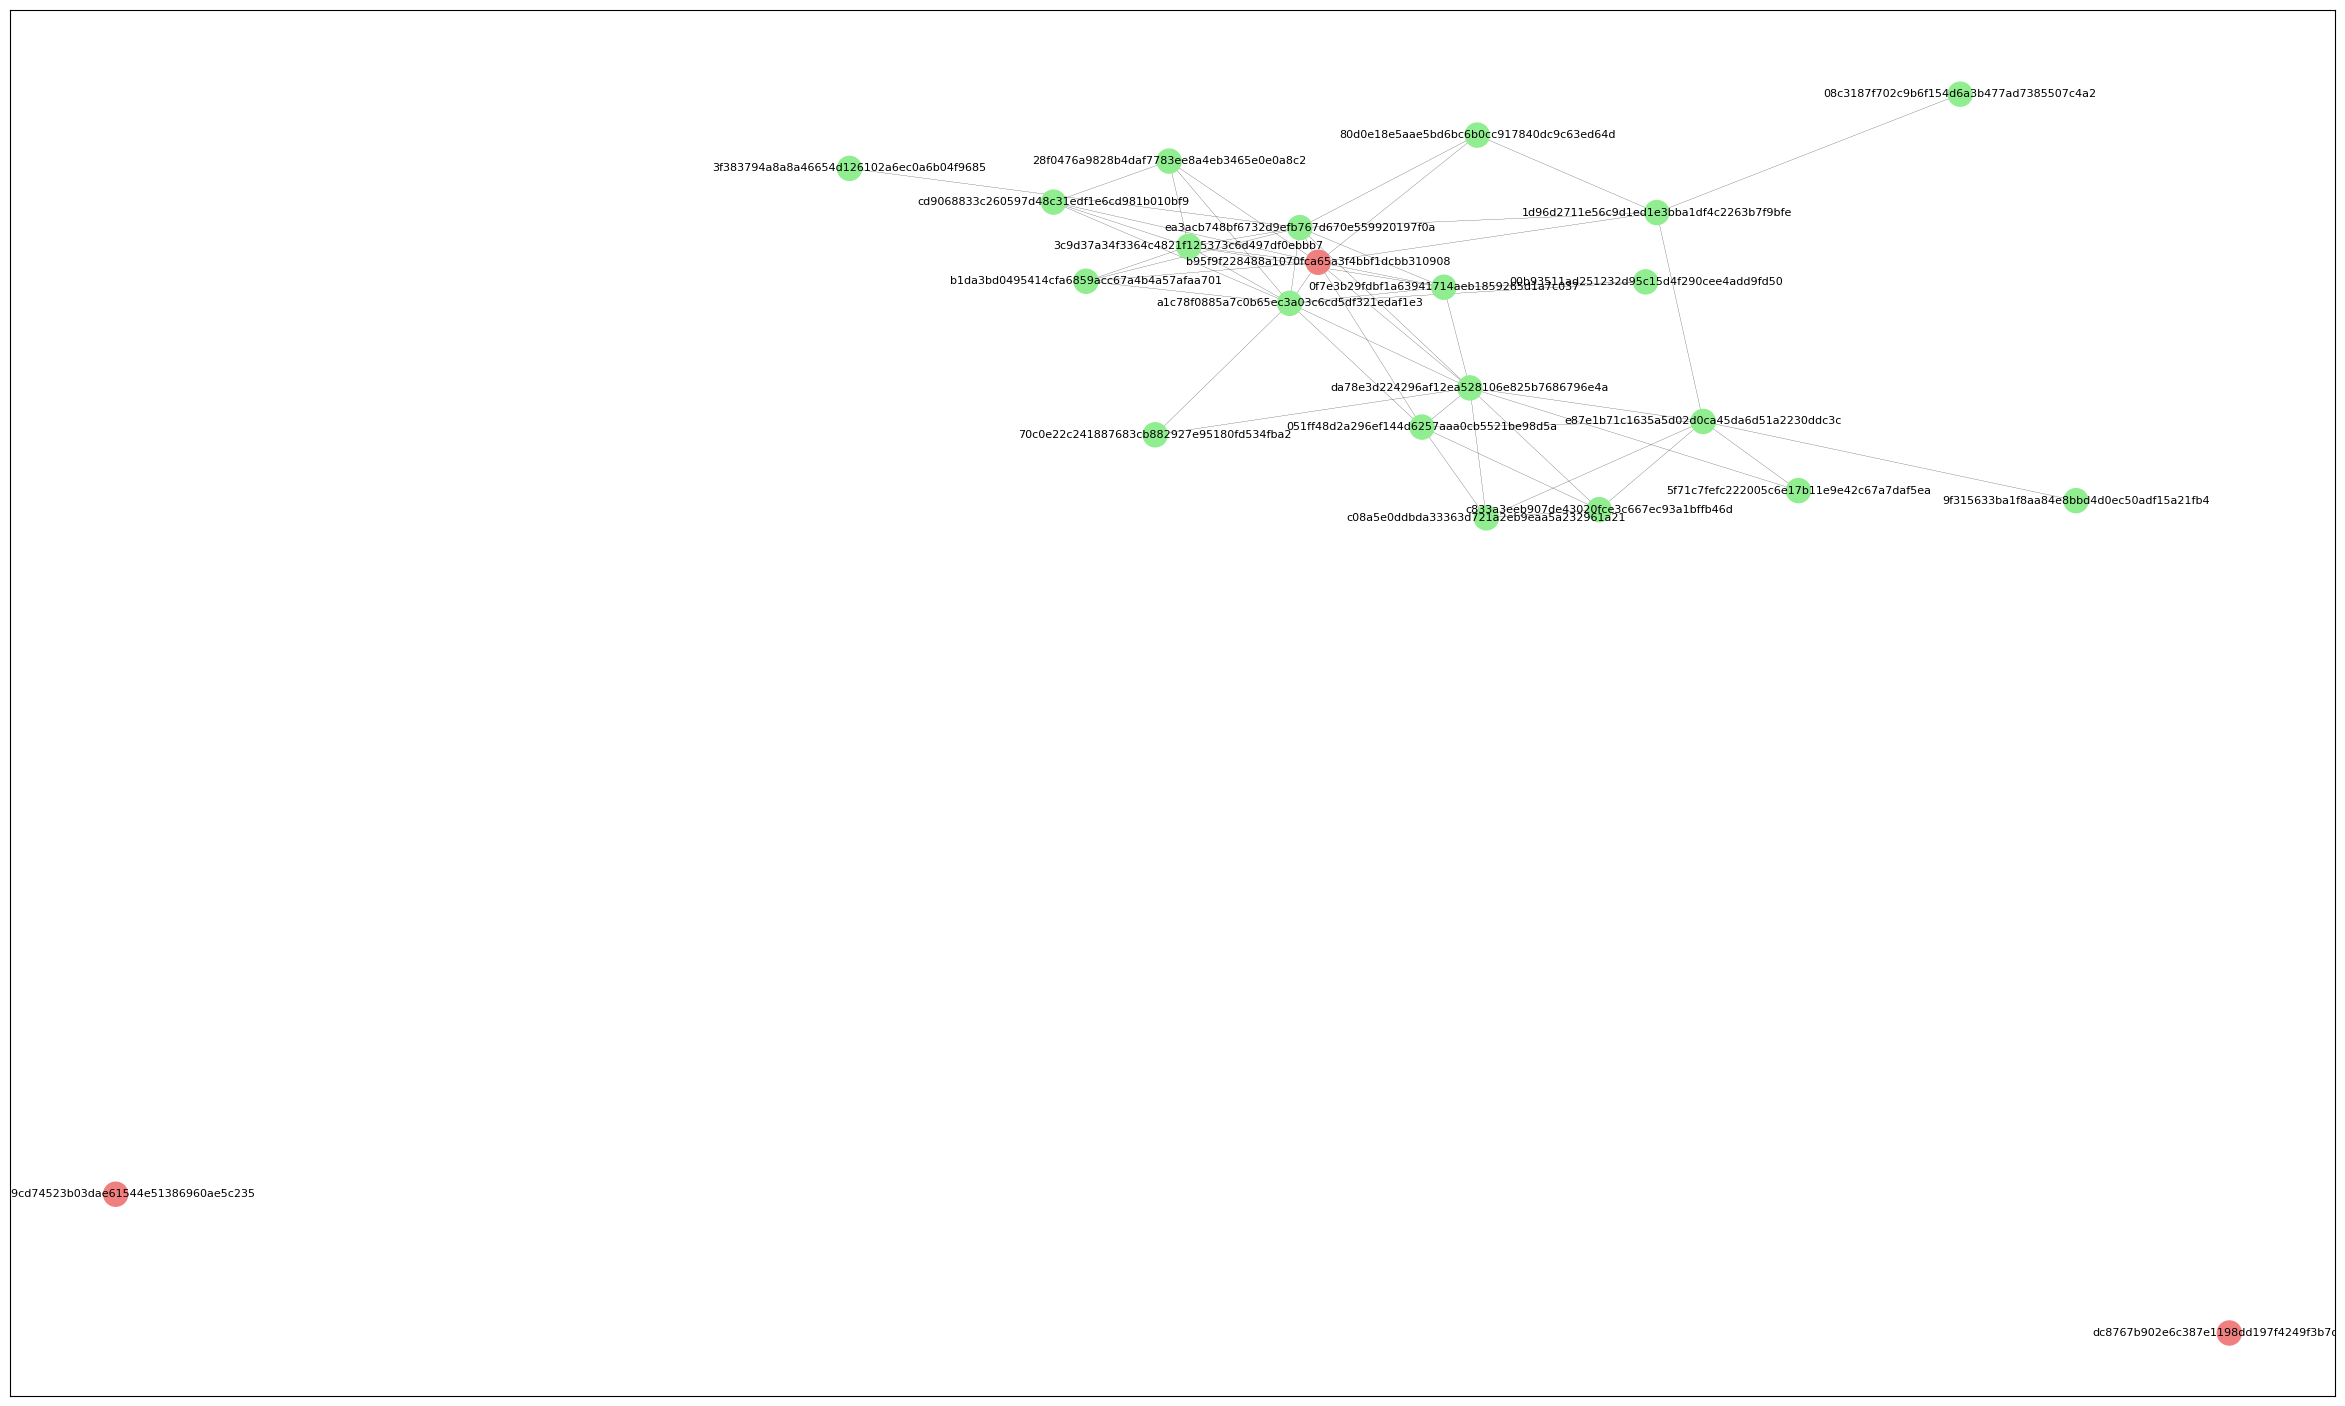

In [37]:
top_nodes = user_weight_df["User"].head(1).tolist()
top_nodes.append(df_components['nodes'][1][0])
top_nodes.append(df_components['nodes'][2][0])

node_colors = ["lightcoral" if node in top_nodes else "lightgreen" for node in weighted_projected_graph.nodes]

pos = nx.spring_layout(weighted_projected_graph, seed=123)

fig, ax = plt.subplots(figsize=(30, 18))
nx.draw_networkx_nodes(weighted_projected_graph, pos, node_size=300, node_color=node_colors)
nx.draw_networkx_edges(weighted_projected_graph, pos, width=0.15)
nx.draw_networkx_labels(weighted_projected_graph, pos, font_size=8)

plt.show()

## Bipartite Graph

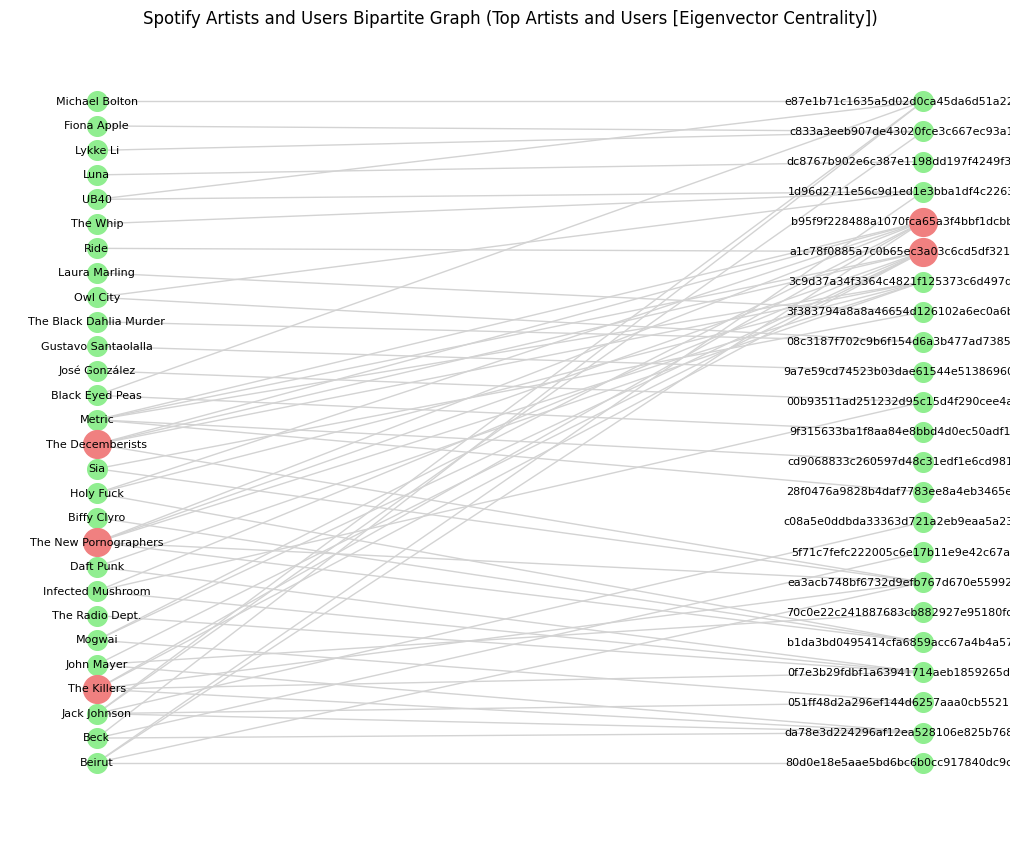

In [54]:
eigenvector_centrality = nx.eigenvector_centrality(A)

top_5_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]

pos = nx.bipartite_layout(A, artist_nodes)

plt.figure(figsize=(10, 8)) 
nx.draw(A, pos, with_labels=True, node_color='lightgreen', node_size=200, edge_color='lightgray',
        font_size=8)

nx.draw_networkx_nodes(A, pos, nodelist=top_5_nodes, node_color='lightcoral', node_size=400)

plt.title("Spotify Artists and Users Bipartite Graph (Top Artists and Users [Eigenvector Centrality])")
plt.show()

## Conclusion

Our analysis of the Spotify 1-Million Song dataset through a bipartite network of artists and listeners has provided key insights into listening habits, artist relationships, and potential marketing strategies. By transforming this network into projected graphs, we identified artists with the most significant listener overlap, highlighting opportunities for collaborations and event planning.
Key findings include:

- Most Listened to Artists & Songs:
    - Beirut's Cherbourg was the most frequently played song, while Mogwai had the highest total user engagement across their tracks. However, The Killers had the highest number of unique listeners, making them a strong candidate for broad audience reach.
- Network Structure & Connections:
    - The unweighted projection revealed that The Killers, The New Pornographers, and The Decemberists had the strongest artist-to-artist connections, while the weighted projection reinforced The Killers as the most widely listened-to artist.
- Segmented Listener Groups (Islands):
    - By detecting isolated network components, we identified three separate groups of listeners. If a concert or marketing campaign were to be planned, featuring The Killers, Gustavo Santaolalla, and Luna would ensure the widest possible reach across these distinct groups.